In [2]:
import numpy as np
import seaborn as sns

from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [3]:
X, y = make_moons(n_samples=100, noise=0.2)

X.shape, y.shape

((100, 2), (100,))

<Axes: >

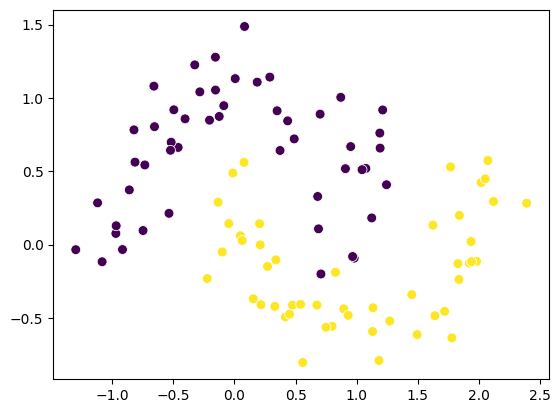

In [13]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], c=y, s=50)

## Linear Activation
- Will only be able to capture linear data
- No matter the number of nodes or layers we add

In [15]:
model = Sequential([
    InputLayer(shape=(2, )),
    Dense(128, activation="linear"),
    Dense(128, activation="linear"),
    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [18]:
model.fit(X, y, epochs=100, validation_split=0.2, verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 596us/step


<Axes: >

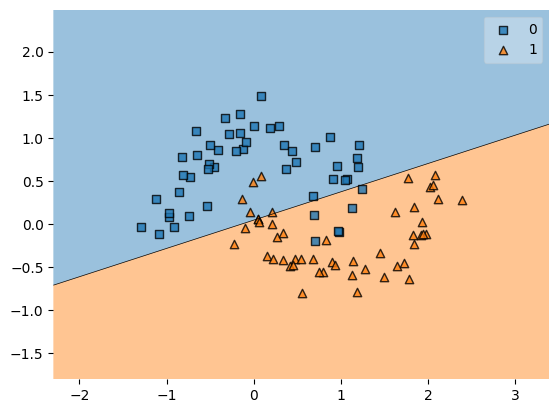

In [19]:
plot_decision_regions(X, y, model)

In [20]:
# As we can see despite so many nodes and 2 hidden layers it could only capture only linear relationship

## Using Non Linear Activation Function

In [44]:
model_2 = Sequential([
    InputLayer(shape=(2, )),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy", optimizer="adam")
model_2.fit(X, y, epochs=100, verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 607us/step


<Axes: >

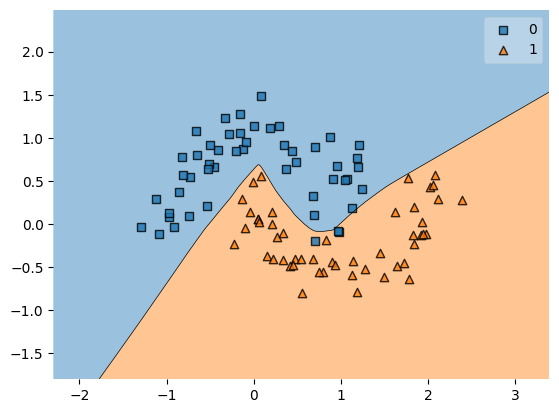

In [45]:
plot_decision_regions(X, y, model_2)

In [54]:
model_3 = Sequential([
    InputLayer(shape=(2, )),
    Dense(128, activation="tanh"),
    Dense(128, activation="tanh"),
    Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy", optimizer="adam")
model_3.fit(X, y, epochs=300, verbose=0) 

# Note: 
# needs more epochs cuz of vanishing gradient problem in case of tanh and sigmoid, so slower convergence
# using 100 epochs here as we did with relu gives me a straight line and i couldnt figure out why lol. This was why

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 597us/step


<Axes: >

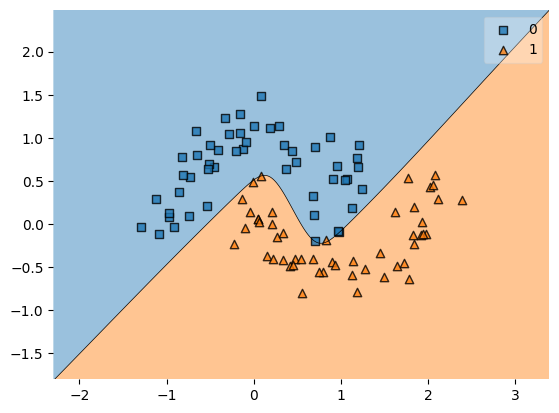

In [55]:
plot_decision_regions(X, y, model_3)

In [64]:
# Sigmoid is giving me a straight line even after lots of epochs. Figure out why
# Isee ... comapring with model_3.weights and model_2.weights, the weights of the model with sigmoid activation is very small

# Vanishing gradient at its finest
# Maybe increase learning rate or add more epochs 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 595us/step


<Axes: >

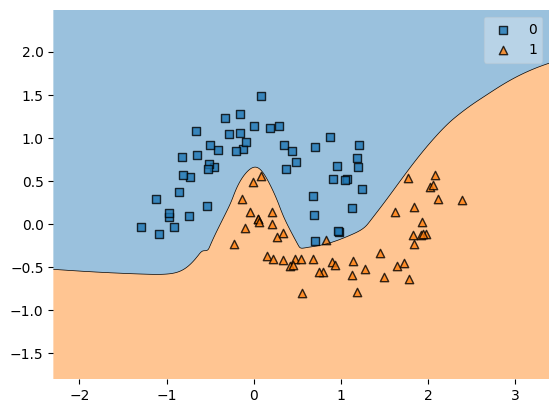

In [65]:
model_4 = Sequential([
    InputLayer(shape=(2, )),
    Dense(128, activation="sigmoid"),
    Dense(128, activation="sigmoid"),
    Dense(1, activation="sigmoid")
])

from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.1)

model_4.compile(loss="binary_crossentropy", optimizer=adam)
model_4.fit(X, y, epochs=300, verbose=0) 

plot_decision_regions(X, y, model_4)

In [ ]:
# Increasing Learning Rate worked to mitigate vanishing gradient
# But its not ideal due to Instability in Training

# Better use ReLU 